# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [3]:
# Your Code Here
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print("Dimension of image:", x_train[0].shape[0:2])
print("Number of classes:", len(class_names))


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
Dimension of image: (32, 32)
Number of classes: 100


### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your Code Here
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
from keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes= len(class_names))
y_test = to_categorical(y_test, num_classes= len(class_names))
print(f'After one-hot encoding: {y_train[0]}')

Before one-hot encoding: [19]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [6]:
from sklearn.model_selection import train_test_split

# Split the training set (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Print shape to verify
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
# Your Code Here
import tensorflow as tf
from keras import layers, models

# Define the CNN model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # # Third Convolutional Block
    # layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    # layers.MaxPooling2D((2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully Connected Layers (Dense Layers)
    layers.Dense(256, activation='relu'),
    layers.Dense(100, activation='softmax')  # 100 classes in CIFAR-100
])

# Print model summary
model.summary()


/opt/anaconda3/envs/dsi_participant/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,924 (4.17 MB)

 Trainable params: 1,093,924 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [8]:
# Your Code Here
# Compile the model
from keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Loss function: 'categorical_crossentropy'. I chose this loss function as we are dealing with categorical class label problem and this loss function known to perform well in such scenarios
Optimizer: 'adam'. I chose this optimizer because it automatically gets out of local mimima of loss if there is any, we don't need to adjust the learning rates manually which eventually helps in designing robust model.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Your Code Here
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.0930 - loss: 4.0259 - val_accuracy: 0.2333 - val_loss: 3.1588
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.2755 - loss: 2.9396 - val_accuracy: 0.3046 - val_loss: 2.7872
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3631 - loss: 2.4955 - val_accuracy: 0.3326 - val_loss: 2.6583
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4349 - loss: 2.1757 - val_accuracy: 0.3429 - val_loss: 2.6499
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4931 - loss: 1.9033 - val_accuracy: 0.3630 - val_loss: 2.6211
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5517 - loss: 1.6629 - val_accuracy: 0.3714 - val_loss: 2.6236
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6099 - loss: 1.4092 - val_accuracy: 0.3617 - val_loss: 2.8193
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6703 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [10]:
# Your Code Here
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3477 - loss: 3.5140
Test accuracy: 0.3559


In [11]:
from sklearn.metrics import classification_report
import numpy as np

 # Get the predictions for the test data
predictions = model.predict(x_test)

# Get the index of the largest probability (i.e. the predicted class)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(true_classes, predicted_classes, digits=4, output_dict=True)

# Extract F1-score
f1_score = report['weighted avg']['f1-score']
print(f"F1-Score: {f1_score:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
F1-Score: 0.3521


F1- Score: The harmonic mean of precision and recall, balancing false positives and false negatives.

F1-Score is useful when class distribution is imbalanced, ensuring that both precision (correct classifications) and recall (capturing all actual positives) are considered.

- Accuracy: 0.3581
- Other metric: F1-Score
- Reason for selection: F1-Score balances precision and recall, making it useful for handling class imbalances.
- Value of metric: 0.3603
- Interpretation of metric value: A higher F1-Score indicates better classification performance. If it's low, the model needs further tuning. Here also we have low f1 score
seems like we have overfitting model


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

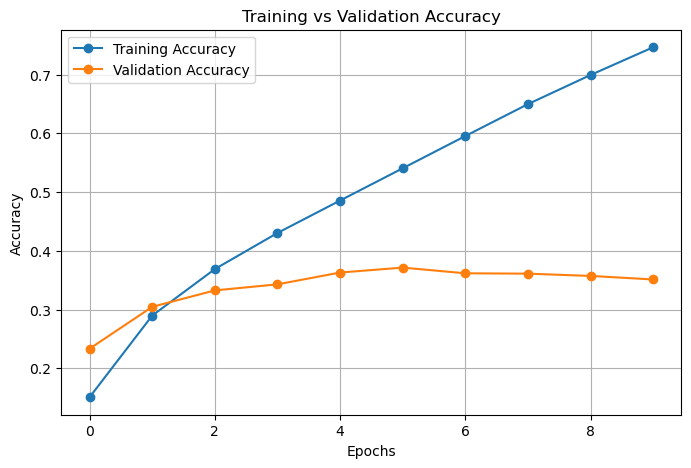

In [12]:
# Your Code Here
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
def plot_learning_curve(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming you have trained the model with:
# history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=64)
plot_learning_curve(history)


✅ Correctly Classified Image:


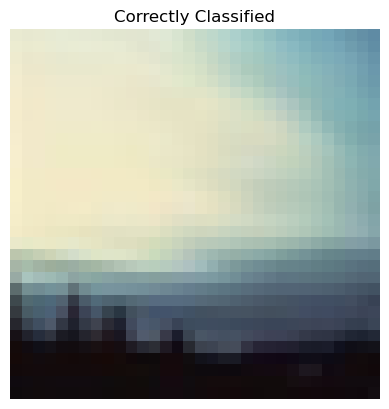

True Label: 23
Predicted Label: 23
Class Probabilities: [3.0225556e-13 2.9160840e-11 2.0281365e-10 5.2003526e-09 9.2769889e-11
 7.4603406e-08 1.3138733e-15 3.9451103e-10 2.0057866e-09 1.0811794e-07
 9.4291590e-07 6.8086062e-12 2.9945035e-08 4.1690073e-13 4.4788995e-16
 1.6227678e-10 7.8611020e-09 4.3126888e-10 1.1296191e-09 4.6859355e-10
 1.0747819e-09 1.9452693e-09 1.4479371e-11 9.8836446e-01 8.0593194e-09
 6.0623229e-06 1.6828433e-11 6.6836980e-11 1.0834806e-08 6.3015521e-10
 1.2561041e-09 5.7091172e-09 1.7240889e-07 3.1063508e-05 2.4356873e-13
 6.7291043e-12 2.3461933e-08 2.7501219e-09 8.7604889e-11 2.5519644e-06
 9.9299280e-07 2.7528943e-08 4.1323528e-13 5.3533300e-15 4.6086435e-10
 2.7510530e-11 1.5818459e-07 4.5883472e-10 3.6877595e-15 4.4522420e-04
 3.0175344e-12 5.4444365e-09 4.1047928e-14 6.1589690e-14 9.0199393e-08
 5.1712407e-10 3.7549455e-08 4.3594519e-09 2.8614966e-09 2.7159859e-07
 5.7745622e-03 2.4688129e-08 1.0216167e-12 1.6783276e-10 2.2024233e-11
 6.7384834e-11 9.4519

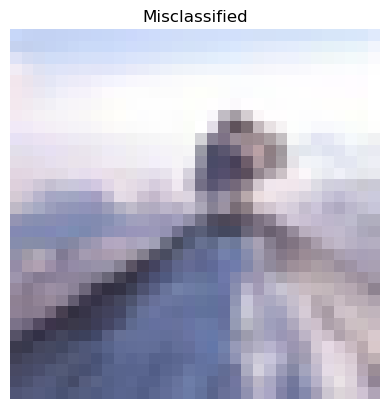

True Label: 49
Predicted Label: 68
Class Probabilities: [3.14236592e-09 8.16851209e-09 1.29396352e-03 2.81398115e-03
 8.39855966e-06 6.64864056e-05 6.46093801e-09 3.39374092e-05
 1.39431155e-03 1.65126166e-05 6.04885736e-06 8.35980847e-03
 1.81958973e-01 1.09909922e-06 5.44578049e-10 1.03168335e-04
 5.99807163e-06 3.02042393e-03 1.24467202e-04 1.32750447e-05
 6.11669675e-05 1.15302810e-05 1.14738450e-05 2.46942067e-03
 2.37427048e-05 7.87243407e-05 2.04167940e-04 1.96848693e-03
 1.92682521e-07 1.22879283e-03 4.97450214e-03 3.94705785e-06
 5.95012025e-05 7.24722689e-04 7.45868660e-04 4.75494657e-04
 4.10413631e-05 4.91215797e-05 3.18210863e-04 6.91289606e-04
 1.29253222e-02 1.66017035e-05 1.78504386e-04 1.01647302e-05
 5.08397212e-03 1.33598456e-04 9.98478616e-04 1.57174412e-07
 2.59855988e-05 9.81618837e-02 7.74322052e-06 6.32957665e-07
 2.67813594e-09 7.71817818e-11 5.65499176e-05 5.27289754e-04
 2.09507160e-03 8.90398587e-05 1.51447675e-04 1.40351010e-03
 7.82027128e-05 2.32463577e-0

In [13]:
import numpy as np

# Find a correctly classified image
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Select one correct and one incorrect image
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Function to plot images with predictions
def plot_image(idx, title):
    plt.imshow(x_test[idx])
    plt.title(title)
    plt.axis("off")
    plt.show()
    print("True Label:", true_classes[idx])
    print("Predicted Label:", predicted_classes[idx])
    print("Class Probabilities:", predictions[idx])

# Plot the correctly classified image
print("✅ Correctly Classified Image:")
plot_image(correct_idx, "Correctly Classified")

# Plot the misclassified image
print("\n❌ Misclassified Image:")
plot_image(incorrect_idx, "Misclassified")


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [14]:
# Your Code Here
# I think reason of low performance is overfitting therefore to address this issue I am trying dropout parameters in model defining.
 # Your Code Here
import tensorflow as tf
from keras import layers, models

# Define the CNN model
model2 = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Fully Connected Layers (Dense Layers)
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25), # Regularization to prevent overfitting
    layers.Dense(100, activation='softmax')  # 100 classes in CIFAR-100
])

# Print model summary
print(model2.summary())

# Compile the model
model2.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/anaconda3/envs/dsi_participant/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,924 (4.17 MB)

 Trainable params: 1,093,924 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

None


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [15]:
# Your Code Here
history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.0656 - loss: 4.1696 - val_accuracy: 0.2262 - val_loss: 3.2171
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2195 - loss: 3.2125 - val_accuracy: 0.2844 - val_loss: 2.8926
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.2864 - loss: 2.8667 - val_accuracy: 0.3208 - val_loss: 2.7162
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3317 - loss: 2.6368 - val_accuracy: 0.3375 - val_loss: 2.6185
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3652 - loss: 2.4622 - val_accuracy: 0.3527 - val_loss: 2.5498
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3952 - loss: 2.3135 - val_accuracy: 0.3694 - val_loss: 2.4806
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4253 - loss: 2.1609 - val_accuracy: 0.3702 - val_loss: 2.4850
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4581 -

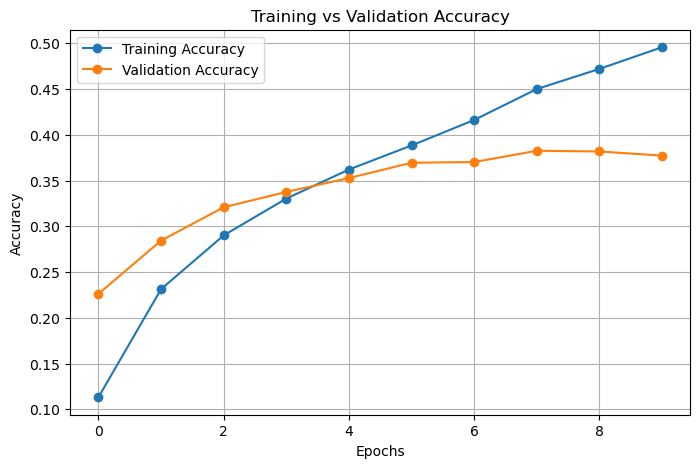

In [16]:
# Assuming you have trained the model with:
# history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=64)
plot_learning_curve(history2)


In [17]:
# Your Code Here
test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3812 - loss: 2.5569
Test accuracy: 0.3793


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

By adding a dropout layer we are able to improve accuracy little bit but earlier we have overfitting problem which can be seen in change of validation accuracy vs change in training accuracy epoch to epoch. That curve has significantly improved here in model2.  
Yes from 0.35 to 0.37.  
Reduced overfitting.  
Yes because we still have very low accuracy,may be we can explore different learning rate and loss methods as well.  
I would try with less number of epochs, different learning rates first.  


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.